In [1]:
import os
import sys
from tqdm.notebook import tqdm
from IPython.display import clear_output

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

In [2]:
from MatSamp import *
import matplotlib.pyplot as plt
import igraph as ig
import networkx as nx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle

plt.rcParams.update(
    {"text.usetex": True, "font.family": "STIXGeneral", "mathtext.fontset": "stix"}
)

visual_style = {
    "vertex_size": 5,
    "vertex_color": "white",
    "vertex_frame_width": 1,
    "edge_width": 0.5,
    "bbox": (400, 400),  # Size of the plot canvas
    "margin": 20,
    "vertex_label_color": "black",
}

In [ ]:
# G = nx.davis_southern_women_graph()
# A = nx.to_numpy_array(G)
# A = np.clip(A, 0, 1)
# net = ig.Graph.Adjacency(A, mode=ig.ADJ_UNDIRECTED).simplify()
# netdes = "davis_women"
n = 64
p = np.round(1.1 * np.log(n) / n,2)
print(n,p)
net = ig.Graph.Erdos_Renyi(n=n, p = p)
# netIdx = 11
# netdes = nets[netIdx]
# net = ig.Graph.Read_Ncol(
#     "SamplingExp/Graph/{}.edges".format(netdes), directed=False
# ).simplify()
# print(net.is_bipartite())


# net = ig.Graph.Read_Ncol("soc-dolphins.edges", directed=False)


32 0.12


0.05938180163502693 (287, 12) 3314


Text(0.5, 1.0, 'r=0.06')

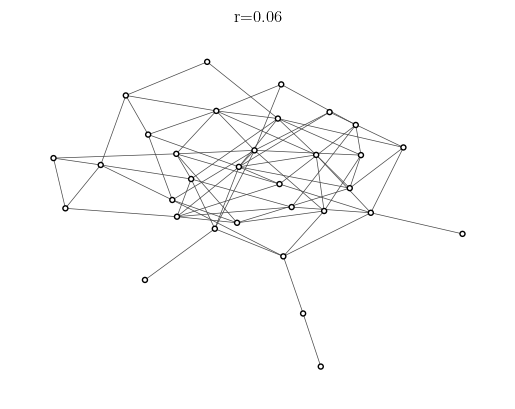

In [4]:
A = ig_to_A(net)
SNet = MatSamp(A, False)

deg = SNet.deg
n = SNet.n

motif_list = [(3, 2), (3, 3)]
org_r, org_motif, org_checker = (
    SNet.assortativity_coeff(),
    SNet.count_motif(),
    SNet.count_checker(),
)
print(org_r, org_motif, np.sum(org_checker))

fig, ax = plt.subplots()
ig.plot(net, target=ax, **visual_style)
ax.set_title(r"r={:.2f}".format(net.assortativity_degree(directed=False)))

In [5]:
target_r = 0.5#SNet.assortativity_coeff()
target_M2 = target_r * (SNet.M3 - SNet.M1) + SNet.M1

sigma_M2 = 10
sigma_r = sigma_M2 / (SNet.M3 - SNet.M1)
print(target_r, sigma_r)

0.5 0.04002630635173312


In [6]:
# print(
#     (left_M2 - SNet.M1) / (SNet.M3 - SNet.M1),
#     (right_M2 - SNet.M1) / (SNet.M3 - SNet.M1),
# )
A = ig_to_A(net)
SNet = MatSamp(A, False)

498


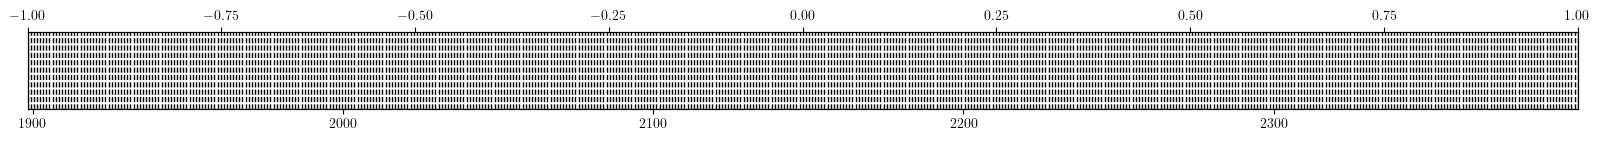

In [72]:
# left_r, right_r = -1, 1
# left_M2, right_M2 = (
#     left_r * (SNet.M3 - SNet.M1) + SNet.M1,
#     right_r * (SNet.M3 - SNet.M1) + SNet.M1,
# )

# base = 5
# k = 2
# a = np.int32(np.logspace(0, k, 3*k+1, base=base))
# print(a)
# a = np.clip(a,1,np.inf)
# x = np.sum(a)
# mult = int((SNet.M3 - SNet.M1)/x)
# a = np.cumsum([x for x in reversed(a) for _ in range(mult)])
# bins = np.unique(np.concatenate(
#     (
#         np.arange(-SNet.M3 + 2 * SNet.M1, SNet.M1 + base**k / 2 - a[-1]),
#         np.int32((SNet.M1 + base**k / 2 - a)[::-1]),
#         np.int32((SNet.M1 - base**k / 2 + a)),
#         np.arange(SNet.M3, (SNet.M1 - base**k / 2 + a[-1]),-1)[::-1],
#     )
# ))
bins = np.linspace(-SNet.M3 + 2 * SNet.M1, SNet.M3, min(500, int(2*SNet.M3-2 * SNet.M1)))
bin_cnt = len(bins) - 1
fig,ax = plt.subplots(figsize = (20,1))
ax.set_yticks([])
# ax.plot(bins,np.zeros(len(bins)), "ok", markersize=2)
for x in bins:
    ax.axvline(x=x, color="k", linestyle="--", linewidth=1)
# bin_cnt = len(bins)-1
xticks = ax.get_xticks()
ax.set_xticks(xticks)
ax.set_xlim([-SNet.M3 + 2 * SNet.M1, SNet.M3])
# print(xticks,xlims)
ax2 = ax.twiny()
# ax2.set_xticks(
#     xticks,
#     ["{:.2f}".format(((tick - SNet.M1) / (SNet.M3 - SNet.M1))) for tick in xticks],
# )
ax2.set_xlim(
    [-1,1])
# print(bins)
print(bin_cnt)

In [ ]:
f = np.exp(-3)
H_star = {}
H = {}
drho = []
S = np.zeros(bin_cnt)
cnt = 0
pos_cnt, neg_cnt = 0, 0
H_sum = 0
tunnel = 0
tunnelFlag = 0
bin_min, bin_max = 1e9, 0
SNet.trackCheckerboard = True

dsSum = 0
dsCnt = 0
np.random.seed(1)
random.seed(1)

In [95]:
while f > 1e-5:
    cnt += 1
    swt = SNet.next("rand")
    
    M2cur = SNet.M2
    M2nxt = SNet.M2_after_swt(swt)
    pos_cnt += int(M2nxt > SNet.M2)
    neg_cnt += int(M2nxt < SNet.M2)
    curidx = np.searchsorted(bins, SNet.M2, side="right") - 1
    nxtidx = np.searchsorted(bins, M2nxt, side="right") - 1
    Scur = S[curidx]

    if curidx == nxtidx and M2nxt != SNet.M2:
        if M2nxt > SNet.M2:
            Snxtnxt = S[curidx + 1]
            M2nxtnxt = (bins[curidx+1] + bins[curidx+2]) / 2
        else:
            Snxtnxt = S[curidx - 1]
            M2nxtnxt = (bins[curidx-1] + bins[curidx]) / 2

        if (M2nxtnxt - SNet.M2) == 0:
            print(
                bins[curidx - 1],
                bins[curidx],
                bins[curidx + 1],
                M2nxt,
                SNet.M2,
                M2nxtnxt,
            )
        Snxt = Scur + (Snxtnxt - Scur) * (M2nxt - SNet.M2) / (M2nxtnxt - SNet.M2)

        # print(SNet.M2, M2nxt, M2nxtnxt, Scur, Snxt, Snxtnxt)
    else:
        Snxt = S[nxtidx]

    if np.log(np.random.rand()) < Scur - Snxt:
        SNet.switch(swt)

    bin_idx = np.searchsorted(bins, SNet.M2, side="right") - 1
    if not(bin_idx in H):
        H[bin_idx] = 0
        H_star[bin_idx] = 0

    H[bin_idx] += 1
    H_star[bin_idx] +=1
    S[bin_idx] += f / (bins[bin_idx+1] - bins[bin_idx])
    cboard = SNet.count_checker()
    drho.append((SNet.assortativity_coeff(), cboard[0],cboard[1]))
    if M2nxt - M2cur != 0:
        dsSum += np.abs((M2nxt - M2cur))/ (SNet.M3 - SNet.M1)
        dsCnt += 1
    bmin = min(H)
    bmax = max(H)
    if tunnelFlag != 1 and bin_idx >= bmax - 0.05*(bmax-bmin) and SNet.assortativity_coeff() >= 0.5:
        tunnel+=1
        tunnelFlag = 1
    elif tunnelFlag != -1 and bin_idx <= bmin + 0.05*(bmax-bmin) and SNet.assortativity_coeff() <= -0.5:
        # tunnel+=1
        tunnelFlag = -1

    if tunnel >= 5:
        print(
            "{:10d} {:10.5e} {:8d} {:8d} {:1d}".format(
                cnt, f, pos_cnt, neg_cnt, tunnel
            ),
        )
        tunnel = 0
        tunnelFlag = 0
        if f/2 > 1e-3:
            H = {}
        f = f/2

        bin_min, bin_max = 1e9, 0

    bin_min, bin_max = min(bin_min, bin_idx), max(bin_max, bin_idx)
    # clear_output(wait=True)
    if cnt % 500000 == 0:
        print(
            "{:10d} {:10.5e} {:8d} {:8d} {:1d}".format(
                cnt, f, pos_cnt, neg_cnt, tunnel
            ),
        )
        bin_min, bin_max = 1e9, 0

    143891 4.97871e-02    49944    50818 5
    219999 2.48935e-02    79256    75122 5
    278197 1.24468e-02    99479    96261 5
    400464 6.22338e-03   140877   141647 5
    500000 3.11169e-03   174457   178474 4
    511203 3.11169e-03   178051   182760 5
    696971 1.55585e-03   251423   242279 5
    836053 7.77923e-04   304404   287714 5
   1000000 3.88961e-04   363915   344576 4
   1035801 3.88961e-04   377593   355970 5
   1175567 1.94481e-04   425178   408433 5
   1407811 9.72404e-05   504446   494447 5
   1500000 4.86202e-05   536763   528127 2
   1615652 4.86202e-05   578294   568928 5
   1740525 2.43101e-05   622613   614236 5
   1874514 1.21550e-05   669132   663315 5


[ 0.0954186  -0.09386925  0.08031775]


/tmp/ipykernel_886091/2486326941.py:7: RuntimeWarning: invalid value encountered in log
  return np.log(A) - 0.5 * ((x - mu) / sigma) ** 2


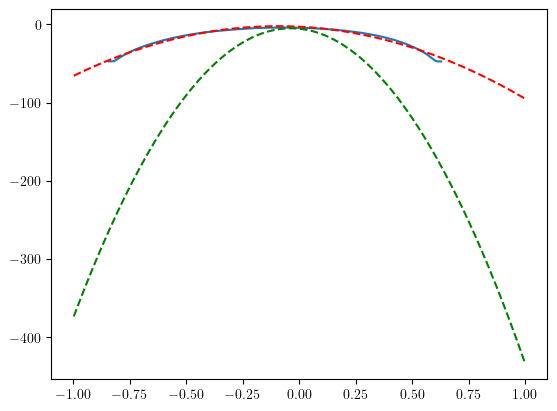

In [96]:
# H_list = [i for i in H]


from scipy.optimize import curve_fit
def gaussian(x, A, mu, sigma):
    #return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return np.log(A) - 0.5 * ((x - mu) / sigma) ** 2


mx = np.max(S)
S_sum = mx + np.log(np.sum(np.exp(S - mx)))
bins_center = np.array(bins[:-1])/2 + np.array(bins[1:])/2
bins_center = (bins_center - SNet.M1) / (SNet.M3 - SNet.M1)
plt.plot(bins_center[S != 0], (S - S_sum)[S != 0])
popt, _ = curve_fit(
    gaussian, bins_center[S != 0], (S - S_sum)[S != 0], p0=[1, -0.04, 0.133]
)
x = np.linspace(min(bins_center), max(bins_center), 500)
print(popt)
plt.plot(x, gaussian(x, *popt), "r--")
plt.plot(x, gaussian(x,0.00629362, -0.03677522,  0.03541745), "g--")

# plt.xlim(-0.1,0.1)

0.02933977667900705


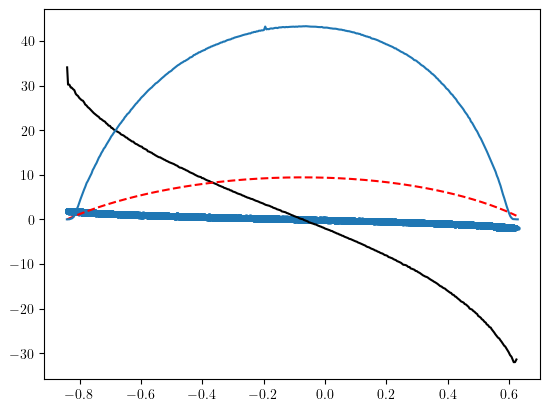

In [110]:
print(dsSum/dsCnt)

datax =  np.array([i[0] for i in drho])
dataa = np.array([i[1] for i in drho])
datab = np.array([i[2] for i in drho])

plt.scatter(datax, np.log(dataa/datab), s=10, linewidth=0)

bins_cnt = 1000
datay = np.log(dataa / datab) 
bin_edges = np.linspace(np.min(datax), np.max(datax), bins_cnt + 1)
bin_indices = np.digitize(datax, bin_edges) - 1
bin_averages = []
bin_center = []
for i in range(bins_cnt):
    bin_mask = bin_indices == i
    if np.any(bin_mask):  # skip empty bins
        bin_avg = np.log(np.sum(dataa[bin_mask]) / np.sum(datab[bin_mask])) / (
            2*dsSum / dsCnt
        )
        bin_center.append((bin_edges[i + 1] + bin_edges[i])/2)
        bin_averages.append(bin_avg)

# print(bin_averages)
plt.plot(bin_center, bin_averages, "k")
# sns.scatte=rplot(x=datax, y=datab, s=10, linewidth=0)
# plt.scatter(datax, dataa, s=0.1, c="red")
# plt.scatter(datax, datab, s=0.1, c="blue")

from scipy.integrate import cumulative_trapezoid

I = cumulative_trapezoid(bin_averages, bin_center, initial=0)
# print(I)
plt.plot(bin_center, I, label="Integral up to x", linestyle="--", color="r")

mx = np.max(S)
S_sum = mx + np.log(np.sum(np.exp(S - mx)))
bins_center = np.array(bins[:-1]) / 2 + np.array(bins[1:]) / 2
bins_center = (bins_center - SNet.M1) / (SNet.M3 - SNet.M1)
plt.plot(bins_center[S != 0], (S)[S != 0])

0.18868021006019864
-0.9808074230366156


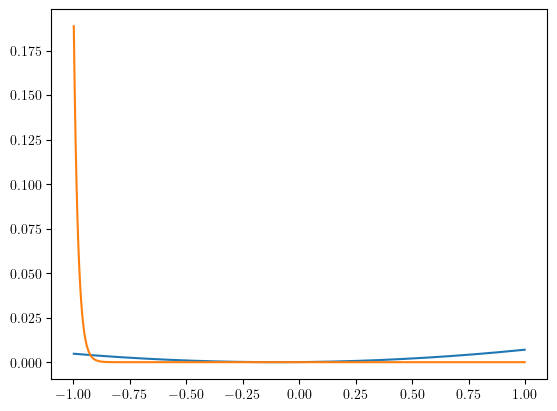

In [11]:
k = 500

x = np.linspace(min(bins_center), max(bins_center), 500)
p0 = gaussian(x, 1, popt[1], popt[2])
p0 = p0/np.sum(p0)
pbeta = np.array([p0[i]*np.exp(-50*x[i]) for i in range(k)])
pbeta = pbeta / np.sum(pbeta)
print(np.mean(np.dot(x, p0)))
print(np.mean(np.dot(x,pbeta)))
plt.plot(x, p0)
plt.plot(x, pbeta)

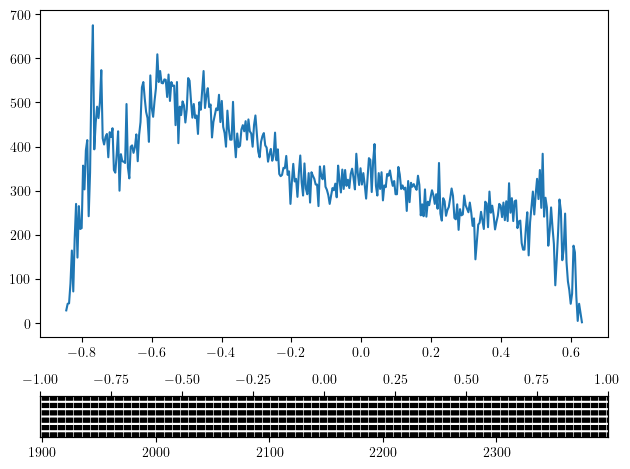

In [88]:
from matplotlib.gridspec import GridSpec

data = [(i, j) for i, j in sorted(H_star.items())]
datax = [(bins[i[0]] + bins[i[0]+1])/2 for i in data]
datay = [i[1] / (bins[i[0] + 1] - bins[i[0]]) for i in data]
# bins_center = np.array(datax[:-1]) / 2 + np.array(datax[1:]) / 2
datax = (np.array(datax) - SNet.M1) / (SNet.M3 - SNet.M1)

fig= plt.figure()
gs = GridSpec(2, 1, height_ratios=[8, 1])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[0])
ax1.set_yticks([])
# ax.plot(bins,np.zeros(len(bins)), "ok", markersize=2)
for x in bins:
    ax1.axvline(x=x, color="k", linestyle="--", linewidth=1)
# bin_cnt = len(bins)-1
xticks = ax1.get_xticks()
ax1.set_xticks(xticks)
ax1.set_xlim([-SNet.M3 + 2 * SNet.M1, SNet.M3])
# print(xticks,xlims)
ax1_ = ax1.twiny()
# ax2.set_xticks(
#     xticks,
#     ["{:.2f}".format(((tick - SNet.M1) / (SNet.M3 - SNet.M1))) for tick in xticks],
# )
ax1_.set_xlim([-1, 1])

ax2.plot(datax, datay)
plt.tight_layout()

In [13]:
A = ig_to_A(net)
SNet = MatSamp(A, False)
assort = []
motifs = []
checkers = []
sample_cnt = 1000000
#SNet.trackCheckerboard = True
#SNet.trackMotif = False

In [14]:
total_iters = sample_cnt
pbar = tqdm(total=total_iters)
cnt = 0
cnt_all = 0
pos_cnt, neg_cnt = 0,0

while cnt < sample_cnt:
    cnt_all += 1
    #swt = SNet.next("rand")
    p = (neg_cnt / (pos_cnt + neg_cnt)) if (pos_cnt + neg_cnt) > 0 else 0.5
    if np.random.rand() < p:
        swt = SNet.next("pos")
    else:
        swt = SNet.next("neg")

    if swt[0]==-1:
        cnt_all-=1
        continue

    M2nxt = SNet.M2_after_swt(swt)
    pos_cnt += int(M2nxt > SNet.M2)
    neg_cnt += int(M2nxt < SNet.M2)

    curidx = np.searchsorted(bins, SNet.M2, side="right") - 1
    nxtidx = np.searchsorted(bins, M2nxt, side="right") - 1
    Scur = S[curidx]

    if curidx == nxtidx and M2nxt != SNet.M2:
        if M2nxt > SNet.M2:
            Snxtnxt = S[curidx + 1]
            M2nxtnxt = (bins[curidx + 1] + bins[curidx + 2]) / 2
        else:
            Snxtnxt = S[curidx - 1]
            M2nxtnxt = (bins[curidx - 1] + bins[curidx]) / 2

        if (M2nxtnxt - SNet.M2) == 0:
            print(
                bins[curidx - 1],
                bins[curidx],
                bins[curidx + 1],
                M2nxt,
                SNet.M2,
                M2nxtnxt,
            )
        Snxt = Scur + (Snxtnxt - Scur) * (M2nxt - SNet.M2) / (M2nxtnxt - SNet.M2)

        # print(SNet.M2, M2nxt, M2nxtnxt, Scur, Snxt, Snxtnxt)
    else:
        Snxt = S[nxtidx]
    # print(Scur-Snxt)

    rcur = (SNet.M2 - SNet.M1) / (SNet.M3 - SNet.M1)
    rnxt = (M2nxt - SNet.M1) / (SNet.M3 - SNet.M1)
    if np.log(np.random.rand()) < 50 * (rnxt-rcur):
        # print("switched")
        SNet.switch(swt)
    # print(gcur, gnxt, Scur, Snxt, gcur / gnxt, Scur/Snxt)

    #
    assort.append((SNet.assortativity_coeff()))
    # if target_r - sigma_r <= SNet.assortativity_coeff() <= target_r + sigma_r:
    #     motifs.append(SNet.count_motif())
    #     checkers.append(SNet.count_checker())
    cnt += 1
    pbar.update(1)
print(cnt / cnt_all, pos_cnt, neg_cnt)

  0%|          | 0/1000000 [00:00<?, ?it/s]

1.0 214988 483590


In [15]:
print(cnt / cnt_all, pos_cnt, neg_cnt)

1.0 214988 483590


Text(0, 0.5, 'Relative frequency')

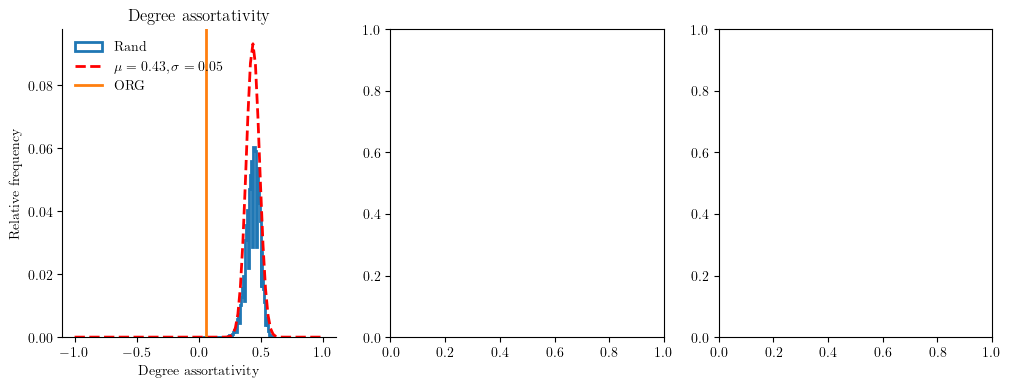

In [16]:
ncol = 3
nrow = 1
psize = 4
max_bin = 80
fig, ax = plt.subplots(nrow, ncol, figsize=(psize * ncol, psize * nrow))
ax = ax.flatten()


# for i in range(len(motifs[0])):
#     cur_ax = ax[i + 1]

#     data = [u[i] for u in motifs]
#     data_s = np.sort(list(set(data)))
#     bin_width = 0 if len(data_s) < 2 else min(np.diff(data_s))
#     bin_width = max(bin_width, (data_s[-1] - data_s[0]) / max_bin, 1)

#     weights = np.ones_like(data) / len(data)
#     cur_ax.hist(
#         data,
#         bins=np.arange(
#             data_s[0] - bin_width / 2, data_s[-1] + bin_width / 2, bin_width
#         ),
#         weights=weights,
#         histtype="step",
#         lw=2,
#         label="Rand",
#     )
#     # sigma_r_ = 0.005
#     # data = [u[i] for u in motifs_band_small]
#     cur_ax.set_title(
#         "Motif {}-{}".format(motif_list[i][0], motif_list[i][1])
#     )  # label_list[i]
#     cur_ax.set_xlabel("Motif count")
#     cur_ax.set_ylabel("Relative frequency")

#     inset_ax = inset_axes(cur_ax, width="15%", height="15%", loc="upper right")
#     for spine in inset_ax.spines.values():
#         spine.set_visible(False)
#     inset_ax.set_xticks([])
#     inset_ax.set_yticks([])
#     ig.plot(
#         ig.Graph.Isoclass(motif_list[i][0], motif_list[i][1]),
#         target=inset_ax,
#         vertex_size=5,
#         vertex_color="white",
#         vertex_frame_width=1,
#         edge_width=0.5,
#         bbox=(400, 400),  # Size of the plot canvas
#         margin=0,
#         vertex_label_color="black",
#     )

#     llim, ulim = cur_ax.get_ylim()
#     cur_ax.plot([org_motif[i], org_motif[i]], [llim, ulim], label="ORG", lw=2)
#     cur_ax.set_ylim(llim, ulim)
#     cur_ax.spines["top"].set_visible(False)
#     cur_ax.spines["right"].set_visible(False)

data = np.sort(list(set(assort)))
weights = np.ones_like(assort) / len(assort)
bin_width = min(np.diff(data))  # [1] - data[0]
bin_width = max(bin_width, (data[-1] - data[0]) / max_bin)
ax[0].hist(
    assort,
    bins=np.arange(data[0] - bin_width / 2, data[-1] + 3 * bin_width / 2, bin_width),
    weights=weights,
    label="Rand",
    histtype="step",
    lw=2,
)

from scipy.stats import norm
mu, std = norm.fit(assort)
x = np.linspace(-1, 1, 100)
p = norm.pdf(x, mu, std)
ax[0].plot(
    x,
    p / max_bin,
    "r--",
    linewidth=2,
    label=r"$\mu={:.2f}, \sigma={:.2f}$".format(mu, std),
)

llim, ulim = ax[0].get_ylim()
ax[0].plot([org_r, org_r], [llim, ulim], label="ORG", lw=2)
ax[0].set_ylim(llim, ulim)
ax[0].legend(frameon=False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].set_title("Degree assortativity")
ax[0].set_xlabel("Degree assortativity")
ax[0].set_ylabel("Relative frequency")